In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_csv_data = pd.read_csv('Churn_Modelling.csv')
raw_csv_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = raw_csv_data.copy()

<b>Data Cleaning<b>

In [5]:
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis = 1, inplace=True)

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<b>Exploratory Data Analysis<b>

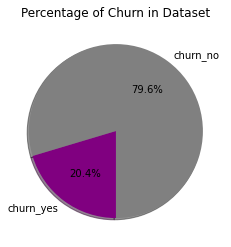

In [8]:
sizes = df['Exited'].value_counts(sort=True)
colors = ['grey', 'purple']
labels = ['churn_no', 'churn_yes']

plt.pie(sizes, labels = labels, autopct='%1.1f%%',colors = colors, shadow=True, startangle=270)

plt.title('Percentage of Churn in Dataset')
plt.show()

Given the pie chart above, roughly every 5th customer leaves the business.

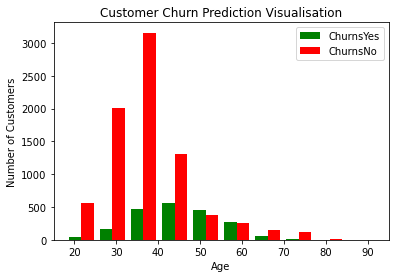

In [10]:
tenure_churn_no = df[df['Exited'] == 0]['Age']
tenure_churn_yes = df[df['Exited'] == 1]['Age']

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['ChurnsYes', 'ChurnsNo'])
plt.legend()

Majority of customers in the age range 50-60 are leaving.
The reason might be other banks offering money for opening an account. Retired people, having more time and willing
to get extra money, are more likely to go for the offer.

<b>Handling categorical features<b>

In [12]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [13]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [14]:
df1 = pd.get_dummies(data = df, columns = ['Geography', 'Gender'], drop_first=True)
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [15]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
df1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

<b>Scaling<b>

In [17]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [19]:
df1.sample(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
528,0.444,0.405405,0.3,0.609124,0.0,1,0,0.192019,1,1,0,0
944,0.790,0.243243,0.8,0.267943,0.0,1,0,0.653953,0,0,0,1
4261,0.888,0.378378,0.8,0.536448,0.0,1,1,0.231896,0,0,1,0
8111,0.420,0.175676,0.3,0.458916,0.0,1,0,0.198995,0,0,0,0


In [20]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [21]:
X = df1.drop(['Exited'], axis = 1)
y = df1['Exited']

In [22]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<b>Balancing the data<b>

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

<b>Splitting the data to prevent overfitting<b>

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state = 5, stratify=y_sm)

In [25]:
X_train.shape

(12740, 11)

In [26]:
X_test.shape

(3186, 11)

<b>Model Creation<b>

In [27]:
import tensorflow as tf


input_size = 12
output_size = 2
hidden_layer_size = 50


model = tf.keras.Sequential([
    tf.keras.layers.Dense( hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

batch_size = 100
max_epochs = 100

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size,  verbose=2)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

128/128 - 0s - loss: 0.6280 - accuracy: 0.6451
Epoch 2/100
128/128 - 0s - loss: 0.5707 - accuracy: 0.7042
Epoch 3/100
128/128 - 0s - loss: 0.5406 - accuracy: 0.7309
Epoch 4/100
128/128 - 0s - loss: 0.5066 - accuracy: 0.7563
Epoch 5/100
128/128 - 0s - loss: 0.4853 - accuracy: 0.7681
Epoch 6/100
128/128 - 0s - loss: 0.4728 - accuracy: 0.7699
Epoch 7/100
128/128 - 0s - loss: 0.4651 - accuracy: 0.7757
Epoch 8/100
128/128 - 0s - loss: 0.4589 - accuracy: 0.7779
Epoch 9/100
128/128 - 0s - loss: 0.4

Testing our model

In [28]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8214


[0.380894273519516, 0.8214061260223389]

In [29]:
yp = model.predict(X_test)
yp[:10]

array([[0.7422932 , 0.25770682],
       [0.02479036, 0.97520965],
       [0.39186808, 0.6081319 ],
       [0.24687572, 0.75312424],
       [0.5223001 , 0.47769988],
       [0.4016475 , 0.59835243],
       [0.2557521 , 0.7442479 ],
       [0.98783153, 0.01216844],
       [0.10810837, 0.8918916 ],
       [0.8170381 , 0.18296187]], dtype=float32)

In [30]:
yp[:10,1]

array([0.25770682, 0.97520965, 0.6081319 , 0.75312424, 0.47769988,
       0.59835243, 0.7442479 , 0.01216844, 0.8918916 , 0.18296187],
      dtype=float32)

In [31]:
y_test[:10]

1095     1
8363     1
13789    1
1676     1
10533    1
898      1
11747    1
4141     0
12854    1
6453     0
Name: Exited, dtype: int64

In [32]:
y_pred = []
for element in yp[:,1]:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [33]:
y_pred[:10]

[0, 1, 1, 1, 0, 1, 1, 0, 1, 0]

In [34]:
# Classification report will print statistics on precision and recall
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1593
           1       0.85      0.79      0.81      1593

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



Text(69.0, 0.5, 'Truth')

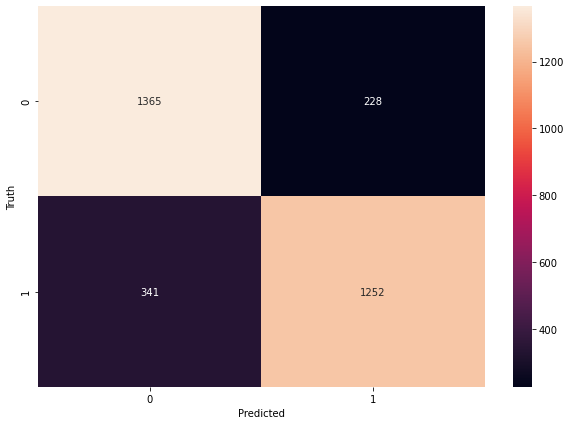

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
confusion_matrix(y_test,y_pred)

array([[1365,  228],
       [ 341, 1252]], dtype=int64)

Accuracy

In [44]:
round((1365+1252)/(1365+1252+228+341),2)

0.82

Precision for 0 class (precision for customers who did not churn)

In [38]:
round(1365/(1365+341),2)

0.83

Precision for 1 class (precision for customers who actually churned)

In [45]:
round(1252/(1252+228),2)

0.85

Recall for 0 class

In [46]:
round(1365/(1365+228),2)

0.86

Recall for 1 class

In [47]:
round(1252/(1252+341),2)

0.79

<b>Feature Importance<b>

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.644     , 0.21621622, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.506     , 0.33783784, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.566     , 0.33783784, 0.3       , ..., 1.        , 0.        ,
        1.        ]])>]
Consider rewriting this model with the Functional API.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, se

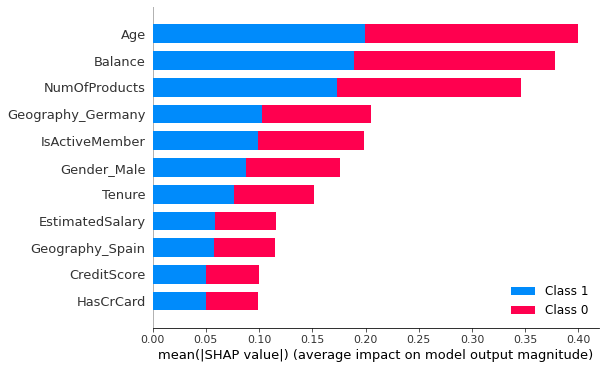

In [43]:
import shap
shap.initjs()

explainer = shap.DeepExplainer(model, data=X[:2000].values)
shap_values = explainer.shap_values(X.values)
shap.summary_plot(shap_values, X, plot_type='bar')

Age is the most important feature accoring to our summary plot